<a href="https://colab.research.google.com/github/minnnnji/Machine_Learning/blob/master/LDA_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dat_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/"
                     'wine/wine.data',header=None)
dat_wine[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
dat_wine.columns = ['class label', 'alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']
print('class Label : ', np.unique(dat_wine['class label']))

class Label :  [1 2 3]


In [4]:
X = dat_wine.loc[:,'alchohol':'proline']
y = dat_wine.loc[:,'class label']

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1, stratify = y) 

In [6]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld = LinearDiscriminantAnalysis()

In [8]:
cld.fit(X_train_std,y_train)

y_train_pred = cld.predict(X_train_std)
y_test_pred = cld.predict(X_test_std)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

1.0
0.9814814814814815


In [9]:
X_lda = cld.fit_transform(X_train_std,y_train)

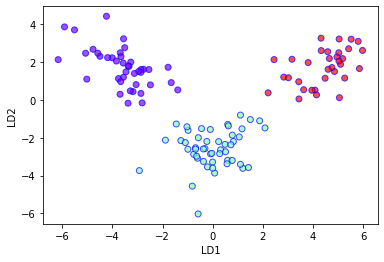

In [10]:
from matplotlib import pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)